In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
Input layer is layer in neural network, which takes inputs from a training set, where size of input layer corresponds to feature size in the data set.

### Hidden Layer:
Sits between Input Layer and Output layer and applies activation function before passing results to next layer. There are often multiple hidden layers in a neural network.

### Output Layer: 
The final layer in a neural network, that receives inputs from previous Hidden layer, optionally applies an activation function, and returns an output representing model's prediction.

### Neuron:

A neuron aka perceptron takes a group of weighted inputs, applies an activation function, and returns an output.

![](https://i.imgur.com/SLMfH3B.png)

### Weight:

Weights affect the activation of neurons, as such they are important to learn via backpropogation.

### Activation Function:

Activation function takes a real value input and outputs another value between 0 and 1. 

### Node Map:

A node map is graph of neural networks with each layer representing different operation.

### Perceptron:

A perceptron is a single layer of neuron

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

![](https://cdn-images-1.medium.com/max/1600/1%2An6sJ4yZQzwKL9wnF5wnVNg.png)

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


class Perceptron():

    def __init__(self, input_size=2, output_size=1, lr=0.01, niter=10):
        self.input_size = input_size
        self.output_size = output_size
        self.lr = lr
        self.niter = niter

        # Initialize weights once
        self.W = self.__init_weights(type_='custom')
        self.b = self.__init_bias()
        self.loss = []

    def __init_weights(self, type_='custom'):
        if type_ == 'uniform':
            W = np.random.random(self.input_size, self.output_size)
        elif type_ == 'normal':
            W = np.random.randn(self.input_size, self.output_size)
        elif type_ == 'custom':
            W = 2 * np.random.random((self.input_size, self.output_size)) - 1
        else:
            raise ValueError(
                'Parameter passed is wrong type, can only be "uniform", "normal", or "custom"')
        return W

    def __init_bias(self):
        return np.full((1, self.output_size), 0.1)

    def __sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

    def __sigmoid_derivative(self, X):
        sx = self.__sigmoid(X)
        return sx * (1-sx)

    def __feed_forward(self, X):
        """
        Computes Z values, which passing through sigmoid gives prediction probability
        """
        # Weighted sum of inputs / weights + bias
        Z = (X @ self.W) + self.b
        return Z

    def __backprop(self, dO, X):
        """
        Calculate weight adjustments
        """
        dW = np.dot(X.T, dO)
        db = np.sum(dO)
        return dW, db

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        try:
            y.shape[1]
        except IndexError:
            y = y.reshape(-1, 1)
        
        for i in range(self.niter):
            # Forward Prop
            Z = self.__feed_forward(X)
            y_hat = self.__sigmoid(Z)

            # Calculate cost/error MAE
            E = (y - y_hat)
            self.loss.append(np.sum(E.T))

            # Calculate adjustments/gradient
            dO = E * self.__sigmoid_derivative(y_hat)
            dW, db = self.__backprop(dO, X)

            # Update the Weights with new gradient
            self.W += self.lr * dW
            self.b += self.lr * db

    def predict_proba(self, X):
        """Return prediction probabilites"""
        return self.__sigmoid(self.__feed_forward(X))

    def predict(self, X, threshold=0.5):
        """Return class labels"""
        pred_probas = self.predict_proba(X)
        return (pred_probas > threshold).astype('int32')

    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(np.arange(1, len(self.loss)+1), np.array(self.loss),
                 marker='o', color='steelblue')
        plt.xlabel('Epochs')
        plt.ylabel('MAE Error')
        plt.show()

    def accuracy_score(self, y_true, y_pred):
        return (y_true == y_pred).sum()

In [4]:
X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy().reshape(-1, 1)

print('----- Shape of data ------')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

nand = Perceptron(input_size=2, output_size=1, lr=0.1, niter=1000)
nand.fit(X, y)

----- Shape of data ------
X.shape: (4, 2)
y.shape: (4, 1)


In [5]:
print('Weights after training')
print(nand.W)
print('Bias after training')
print(nand.b)

test_X = np.array

print(f'Predict X1: 0, X2: 0, y = {nand.predict(np.array([0, 0]))}')
print(f'Predict X1: 0, X2: 1, y = {nand.predict(np.array([0, 1]))}')
print(f'Predict X1: 1, X2: 0, y = {nand.predict(np.array([1, 0]))}')
print(f'Predict X1: 1, X2: 1, y = {nand.predict(np.array([1, 1]))}')

Weights after training
[[-2.89044989]
 [-2.88592605]]
Bias after training
[[4.45858339]]
Predict X1: 0, X2: 0, y = [[1]]
Predict X1: 0, X2: 1, y = [[1]]
Predict X1: 1, X2: 0, y = [[1]]
Predict X1: 1, X2: 1, y = [[0]]


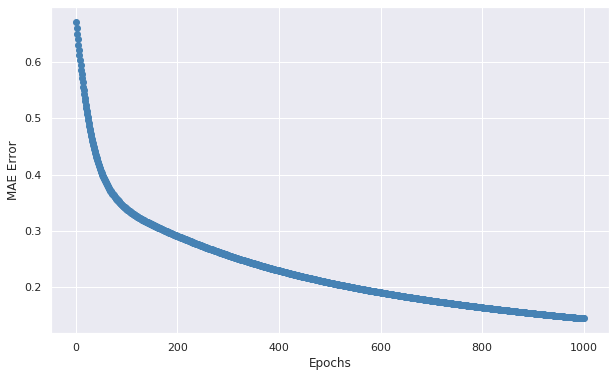

In [6]:
nand.plot_loss();

In [7]:
np.array([1, 2, 3, 4]).reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4]])

In [8]:
np.array([1, 2, 3, 4]).reshape(1, -1)

array([[1, 2, 3, 4]])

In [9]:
(np.array([[1, 2, 3]]) > np.array([[1, 1, 1]])).astype(int)

array([[0, 1, 1]])

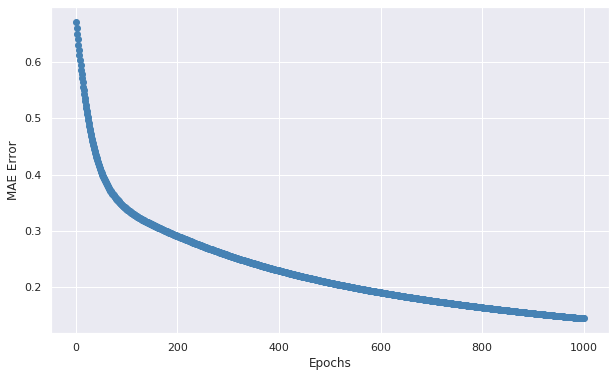

In [10]:
nand.plot_loss()

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [11]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [12]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = list(diabetes)[:-1]
target = 'Outcome'

# Split train, test, X, y
X = diabetes[features].to_numpy()
y = diabetes[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("---------- Shape ----------")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

---------- Shape ----------
(514, 8) (254, 8)
(514,) (254,)


In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = Perceptron(input_size = X_train.shape[1], output_size=1, lr=0.01, niter=10000)


clf.fit(X_train_scaled, y_train.reshape(-1, 1))

y_test_hat = clf.predict(X_test)
y_train_hat = clf.predict(X_train)


print(f'Accuracy Train Score: {accuracy_score(y_train, y_train_hat) }')
print(f'Accuracy Test Score: {accuracy_score(y_test_hat, y_test)}')

Accuracy Train Score: 0.3540856031128405
Accuracy Test Score: 0.33858267716535434


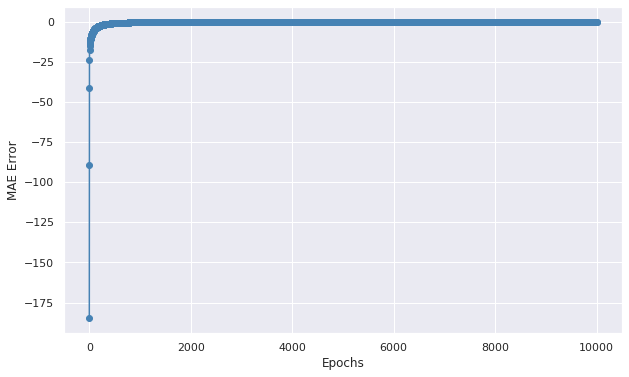

In [18]:
clf.plot_loss()

In [15]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=42, solver='lbfgs')

logit.fit(X_train, y_train)

logit.score(X_test, y_test)

/home/asura/miniconda3/envs/U4-S2-NNF/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7480314960629921

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?